<a href="https://colab.research.google.com/github/sulavpanthi/Deep-learning/blob/master/mnist_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import Tensorflow 2.0
%tensorflow_version 2.x
import tensorflow as tf 

import matplotlib.pyplot as plt
import numpy as np
import random

assert len(tf.config.list_physical_devices('GPU')) > 0

In [2]:
mnist = tf.keras.datasets.mnist
(train_images,train_labels), (test_images, test_labels) = mnist.load_data()
train_images.shape
train_images = (np.expand_dims(train_images, axis = -1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28, 1)

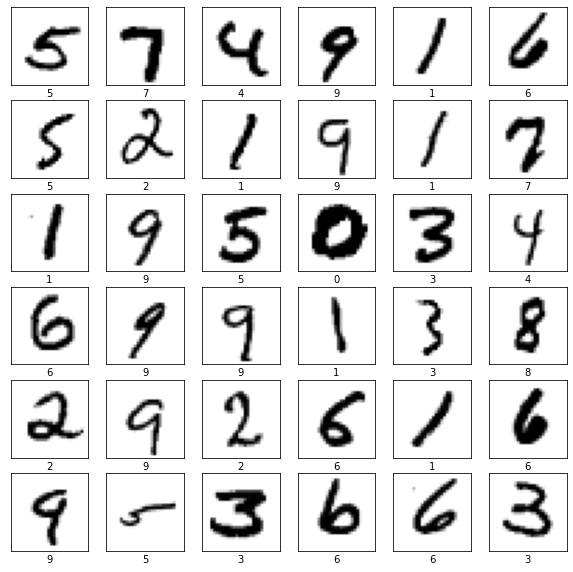

In [4]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])


# Neural Network without convolution operation

In [0]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation = tf.nn.softmax)
  ])
  return fc_model

model = build_fc_model()

In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 1e-1), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
BATCH_SIZE = 64
EPOCHS = 5

model.fit(train_images, train_labels, batch_size = BATCH_SIZE, epochs = EPOCHS)

Epoch 1/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3754 - accuracy: 0.8962
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2048 - accuracy: 0.9410
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1550 - accuracy: 0.9554
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1261 - accuracy: 0.9642
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1057 - accuracy: 0.9699


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.1093 - accuracy: 0.9675


In [9]:
print('Accuracy is {}'.format(test_acc))
print('Loss is {}'.format(test_loss))

Accuracy is 0.9674999713897705
Loss is 0.10929932445287704


# Neural Network with convolution

In [10]:
def build_cnn_model():
  cnn_model = tf.keras.Sequential([
                                   tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
                                   tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                   tf.keras.layers.Conv2D(filters = 36, kernel_size=(3,3), activation=tf.nn.relu),
                                   tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  return cnn_model

model = build_cnn_model()
model.predict(train_images[[0]])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  115328    
_________________________________________________________________
dense_3 (Dense)              multiple                 

In [0]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
938/938 [==============================] - 2s 3ms/step - loss: 0.1830 - accuracy: 0.9457
Epoch 2/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0555 - accuracy: 0.9833
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.0399 - accuracy: 0.9877
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0298 - accuracy: 0.9907
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0228 - accuracy: 0.9925


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0317 - accuracy: 0.9898


In [14]:
print('Accuracy is {}'.format(test_acc))

Accuracy is 0.989799976348877


In [15]:
predictions = model.predict(test_images)
predictions[0]

array([1.6432870e-07, 5.4308049e-07, 7.9500666e-07, 7.0980991e-06,
       4.8227178e-09, 8.3080764e-08, 1.2096932e-13, 9.9998939e-01,
       2.7056373e-07, 1.6764677e-06], dtype=float32)

In [0]:
pred = np.argmax(predictions[0])

In [17]:
pred

7

In [18]:
print("label is {}".format(test_labels[0]))


label is 7


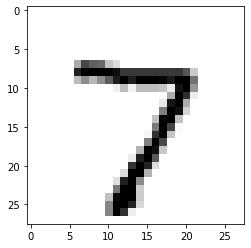

In [19]:
plt.imshow(test_images[0, :, :, 0], cmap = plt.cm.binary)